1. Select the most appropriate feature of Boston housing dataset using Elastic Net Regression Model.

In [1]:
# feature selection using Elastic Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [8]:
from sklearn.linear_model import ElasticNet

In [2]:
boston = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/ElasticNet_Regression/Data/boston_houses.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# drop MEDV column and take remaining column as x
x = boston.drop('MEDV', axis=1)

In [16]:
# take only MEDV column as y
y = boston['MEDV'].values

In [17]:
# take the names of the columns 
names = x.columns
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BLACK', 'LSTAT'],
      dtype='object')

In [18]:
# range of the columns 
rng = range(len(names))
rng

range(0, 13)

In [19]:
# Create an object to Elastic Net 
es = ElasticNet(l1_ratio=0.5)

In [20]:
# train the model 
model = es.fit(x,y)

In [21]:
# find the co-efficients of terms in elastic net models equation
# the term with highest co-efficient will exert more influence
es_coef = model.coef_
print(es_coef)

[-0.08037077  0.05323951 -0.0126571   0.         -0.          0.93393555
  0.0205792  -0.76204391  0.30156906 -0.01643916 -0.7480458   0.00833878
 -0.75842612]


In [22]:
# find the position of maximum value in the co-efficients
n = np.argmax(es_coef)
n

5

In [25]:
# find the column name at nth position in x 
print('The most influencing column =',names[n])

The most influencing column = RM


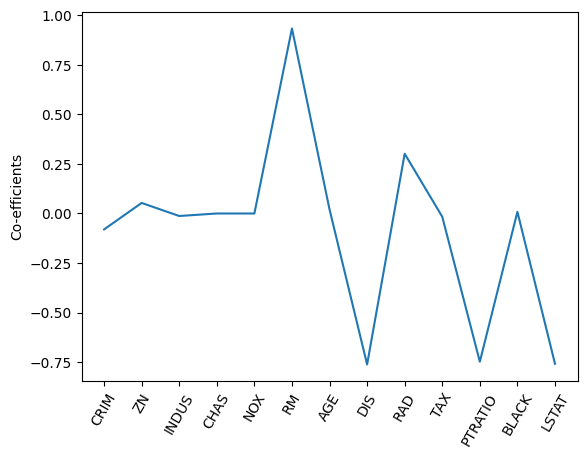

In [24]:
# draw the line plot between range and co-efficients
plt.plot(rng,es_coef)
plt.xticks(rng,names,rotation=60)
plt.ylabel('Co-efficients')
plt.show()

# highest value 3.70320175 among all other co-efficients.5th column s nothing but 'RM' column that represents the Number of rooms in the house.